## Using MELTSto calculate the liquidus of multiple compositions

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyMELTScalc as M

import sys
sys.path.append(r'MELTS')

To test the ability of MELTS to act at liquid-only thermometers we need some experiments to test them against. Here, we use a database of experimental data compiled by P. Wieser and isolate all the melt compositions in the $Liq$ sheet. We then list the elements that must be present for MELTS calculations to be performed.

In [8]:
Data = pd.read_excel('LEPR_Wet_Stitched_Sept2022.xlsx', sheet_name = 'Liq')

The entire experimental dataset contains over 2000 samples. Therefore, to reduce the computational time in this example spreadsheet I isolate 200 experiments (randomly selected) to be used in the following calculations. A new DataFrame is constructed using only these experiments.

In [9]:
Ch = np.random.choice(range(len(Data['SiO2_Liq'])), 200, replace=False)
Test = Data.copy()
Test = Test.loc[Ch]
Test = Test.reset_index(drop = True)

In [ ]:
import os
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

In [10]:
Results = M.findLiq_multi(Model = "pMELTS", 
                             bulk = Test, 
                             T_initial_C = Test['T_K'].values-200, 
                             P_bar = Test['P_kbar'].values*1000,
                            Fe3Fet_Liq = 0.15)

  0%|          | 0/25 [00:00<?, ?it/s]

In [5]:
Results

,T_Liq,liquidus_phase,fluid_saturated,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,CO2
0,940.0,clinopyroxene1,No,62.977939,0.257053,16.065801,0.306470,0.0,1.563618,0.082624,0.587549,4.268913,4.232191,1.285264,0.091805,8.280773,0.0
1,1084.1,plagioclase1,No,65.278108,0.915067,13.805579,1.088697,0.0,5.554557,0.149196,1.452172,4.336623,5.132333,1.293030,0.000000,0.994638,0.0
2,1181.7,olivine1,No,50.806267,0.784653,15.987300,1.830130,0.0,9.337368,0.186355,7.454201,9.778735,1.843934,0.323669,0.000000,1.667387,0.0
3,1064.6,spinel1,No,54.804418,1.330021,16.507355,1.546361,0.0,7.889573,0.160357,2.452521,5.857753,2.556282,1.330021,0.000000,5.565337,0.0
4,1079.9,olivine1,No,46.154893,0.678194,18.556151,1.363697,0.0,6.957614,0.150710,6.000136,11.397433,2.901165,0.103613,0.084774,5.651620,0.0
5,913.9,plagioclase1,No,76.745245,0.253897,11.347242,0.232647,0.0,1.186968,0.068357,0.224601,1.093710,3.681506,2.138594,0.000000,3.027233,0.0
6,1147.2,olivine1,No,55.265904,1.683328,13.385503,2.179350,0.0,11.119094,0.162249,4.330008,7.950178,2.920474,1.003913,0.000000,0.000000,0.0
7,1166.2,olivine1,No,50.920150,0.351507,18.281893,0.906829,0.0,4.626666,0.000000,7.965716,11.973148,2.985679,0.000000,0.000000,1.988413,0.0
8,1301.9,garnet1,No,52.421087,1.109600,18.913177,1.064194,0.0,5.429541,0.000000,4.018550,8.486938,4.928222,0.569794,0.000000,3.058896,0.0
9,1238.4,plagioclase1,No,63.956735,0.585939,18.273352,0.519679,0.0,2.651414,0.000000,2.492724,5.452212,4.329990,1.012979,0.724975,0.000000,0.0


Text(0, 0.5, 'Experimental Temperature ($^{o}$C)')

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


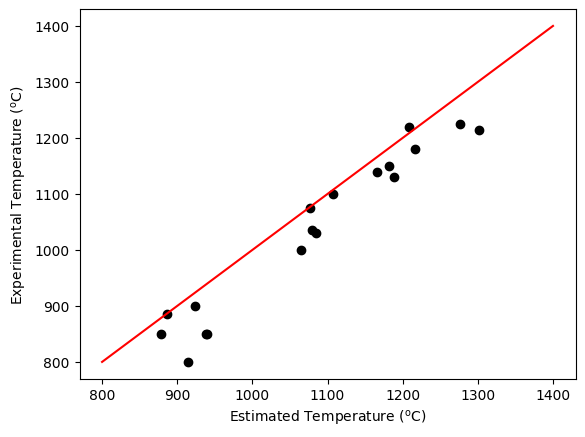

In [6]:
f, a = plt.subplots(1,1)
a.plot(Results['T_Liq'][(Test['H2O_Liq'] > 0) & (Results['T_Liq'] > 0)], 
       Test['T_K'][(Test['H2O_Liq'] > 0) & (Results['T_Liq'] > 0)]-273.15, 'ok')
a.plot([800,1400],[800,1400], 'r-')
a.set_xlabel('Estimated Temperature ($^{o}$C)')
a.set_ylabel('Experimental Temperature ($^{o}$C)')